# XAI SHAP applied to XGBRegressor

Load trained XGBRegressor

In [1]:
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from faa_p2.config import CLEAN_DATA_FILE, MODELS, RANDOM_STATE, DATA_SPLIT_RATIO, XGBR

# ============ load data + model ============
df = pd.read_csv(CLEAN_DATA_FILE, index_col=0)
y = df["medv"]
X = df.drop(columns=["medv"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=DATA_SPLIT_RATIO, random_state=RANDOM_STATE
)

model = joblib.load(MODELS[XGBR]["filename"])

SHAP values shape: (102, 13)


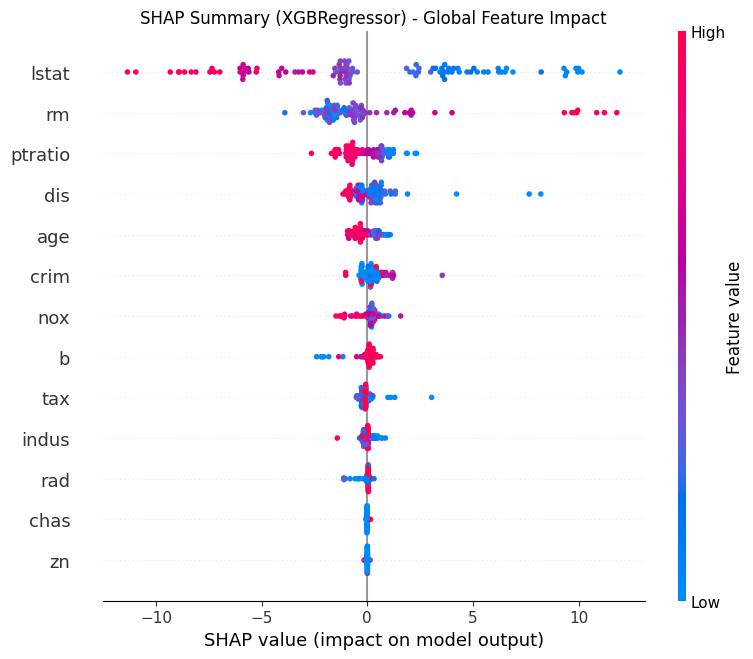

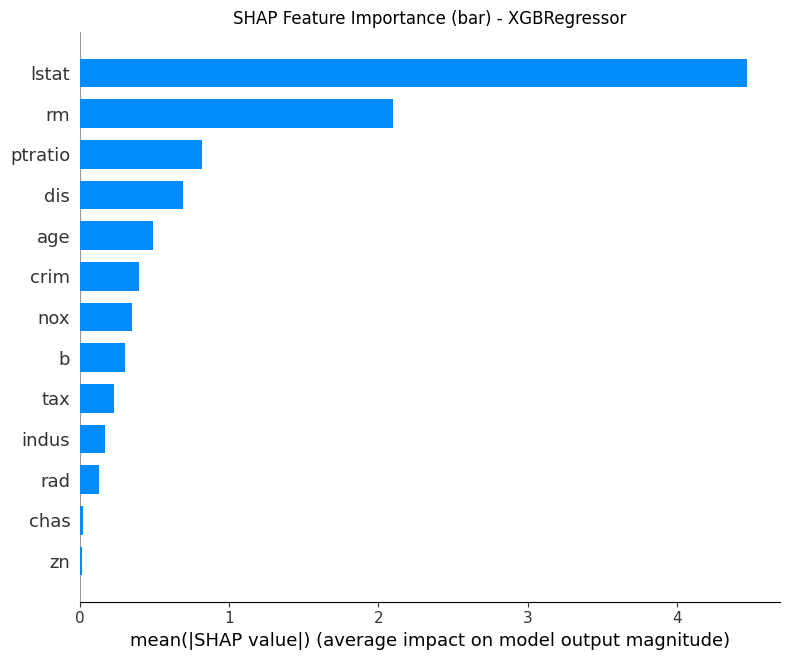

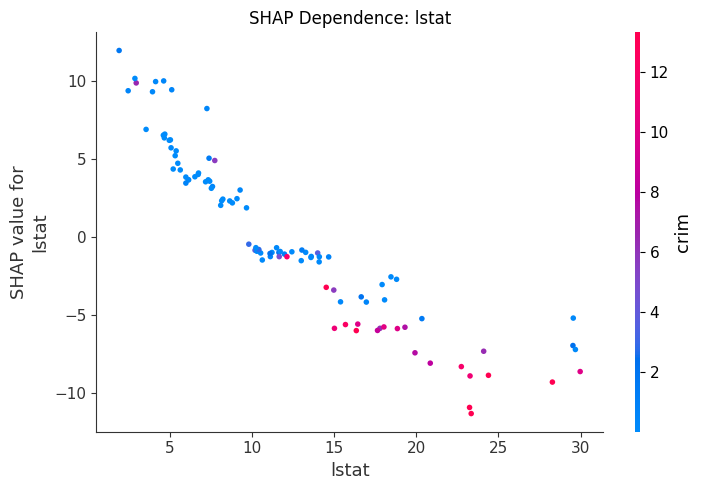

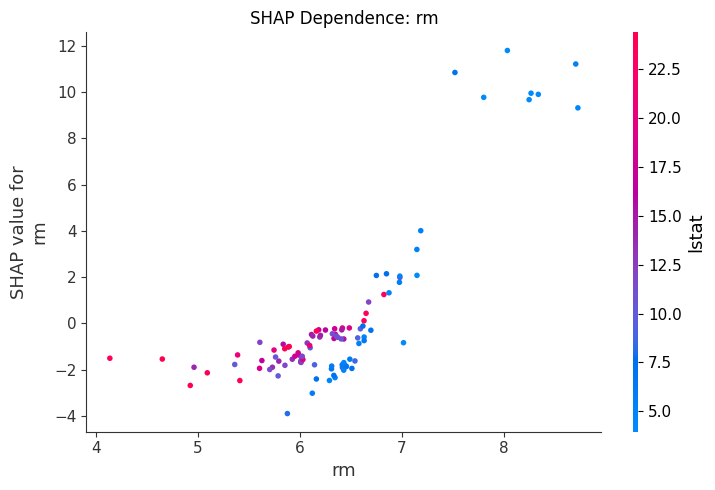

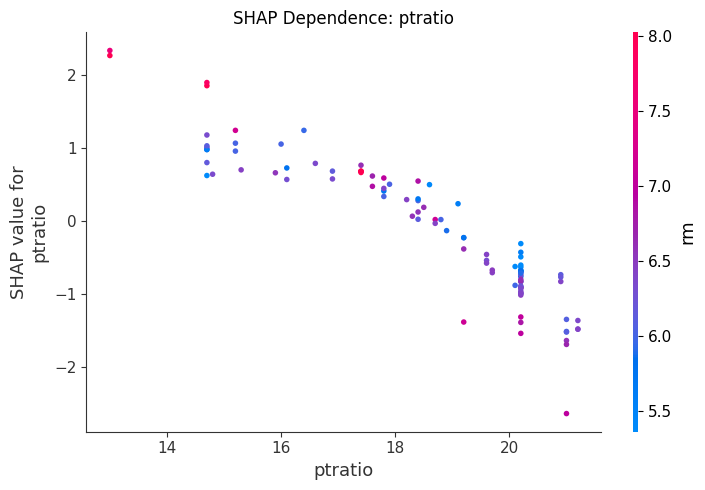

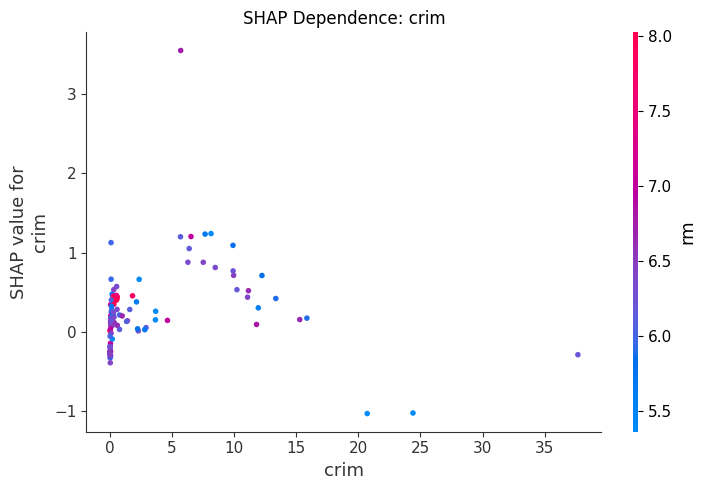

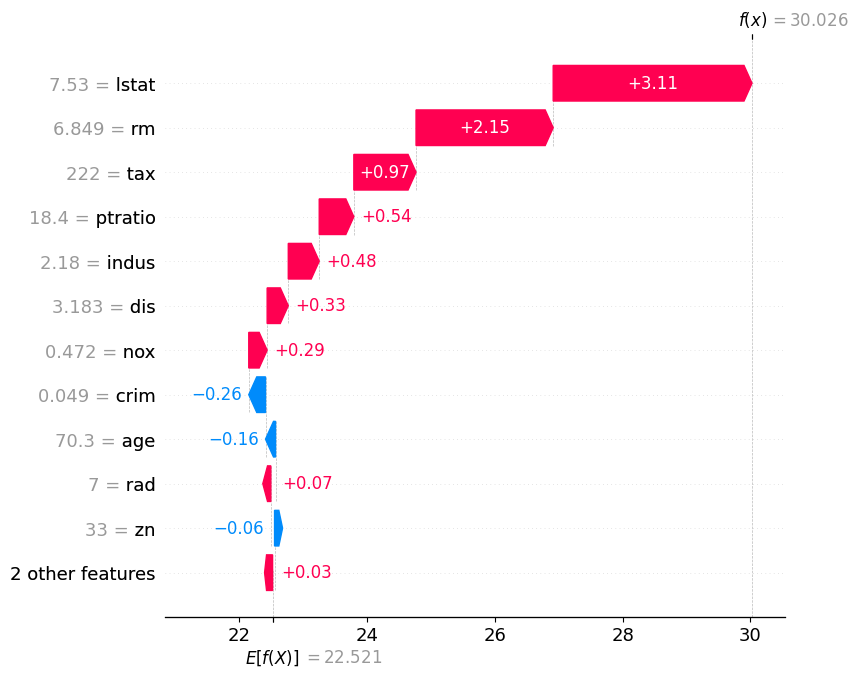

In [ ]:
# ============ SHAP ============
import shap

shap.initjs()

# for tree-based models TreeExplainer is the right one
explainer = shap.TreeExplainer(model)

X_test_small = X_test.copy()
shap_values = explainer.shap_values(X_test_small)

print("SHAP values shape:", np.array(shap_values).shape)

# 1) global importance (beeswarm)
shap.summary_plot(shap_values, X_test_small, show=False)
plt.title("SHAP Summary (XGBRegressor) - Global Feature Impact")
plt.tight_layout()
plt.show()

# 2) global importance (bar)
shap.summary_plot(shap_values, X_test_small, plot_type="bar", show=False)
plt.title("SHAP Feature Importance (bar) - XGBRegressor")
plt.tight_layout()
plt.show()

# 3) dependence plot for top features (pick the most relevant features)
for feat in ["lstat", "rm", "ptratio", "crim"]:
    if feat in X_test_small.columns:
        shap.dependence_plot(feat, shap_values, X_test_small, show=False)
        plt.title(f"SHAP Dependence: {feat}")
        plt.tight_layout()
        plt.show()

# 4) local explanation for one example
i = 0  # change index to inspect another test point
x_row = X_test_small.iloc[i]

# force plot (interactive in Jupyter)
force_plot = shap.force_plot(
    explainer.expected_value,
    shap_values[i],
    x_row,
    matplotlib=False,
)
force_plot  # display

# waterfall plot (static)
sv = shap.Explanation(
    values=shap_values[i],
    base_values=explainer.expected_value,
    data=x_row.values,
    feature_names=X_test_small.columns,
)
shap.plots.waterfall(sv, max_display=12)